In [4]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web

start = dt.datetime(2020,1,1)
end = dt.datetime(2020,4,5)

main_df = pd.DataFrame()
tickers = ['PETR4.SA']

for ticker in tickers:
    df = web.DataReader(ticker, 'yahoo', start, end)  
    main_df['{}'.format(ticker)] = df['Close'].round(4)
    main_df['Volume'] = df['Volume'].round(0)

main_df.head()

c:\users\lucas\appdata\local\programs\python\python38-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,PETR4.SA,Volume
Date,,
2020-01-02,30.70,37774500.0
2020-01-03,30.45,71595600.0
2020-01-06,30.81,81844000.0
2020-01-07,30.69,32822000.0
2020-01-08,30.50,48215600.0


In [5]:
database = pd.DataFrame(index=main_df.index)
database = main_df.copy()

database['sma'] = database['PETR4.SA'].rolling(5).mean()
database['volume_bb'] = database['Volume'].rolling(5).mean() + database['Volume'].rolling(5).std()

database.dropna(inplace=True)
database.head()

,PETR4.SA,Volume,sma,volume_bb
Date,,,,
2020-01-08,30.50,48215600.0,30.630,7.583441e+07
2020-01-09,30.40,36102700.0,30.570,7.583640e+07
2020-01-10,30.27,25397500.0,30.534,6.712196e+07
2020-01-13,30.33,30676800.0,30.438,4.317041e+07
2020-01-14,30.00,39796500.0,30.300,4.476117e+07


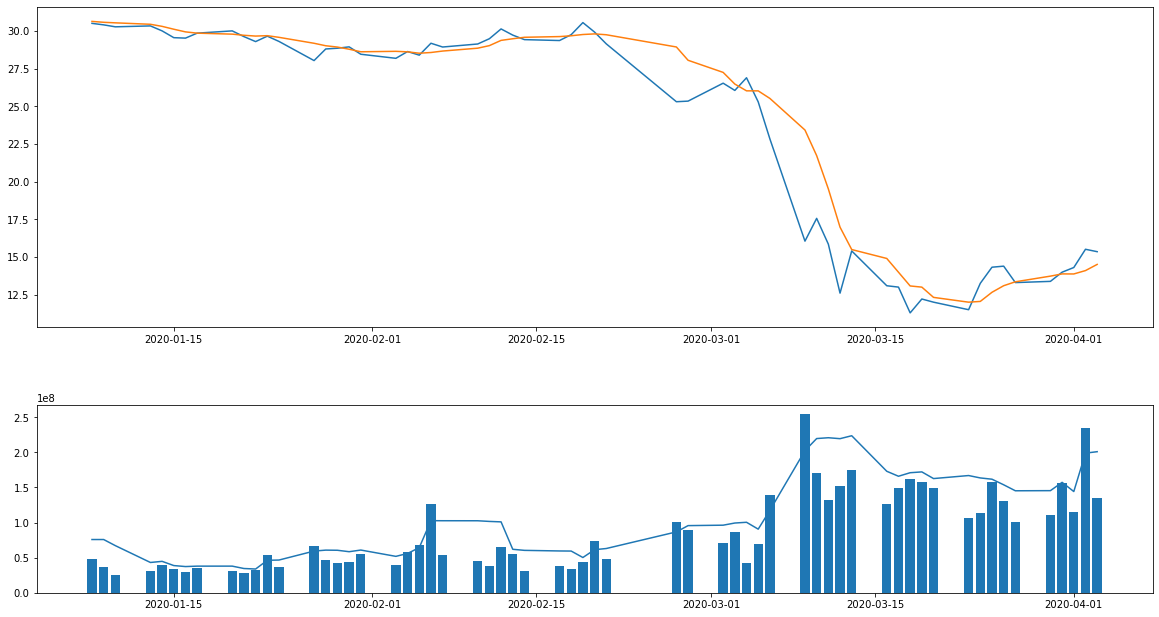

In [6]:
plt.figure(figsize=(20,12))
plt.xticks(database.index)
plt.xlim(pd.Timestamp('2020-01-14'), pd.Timestamp('2020-04-03'))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((10,1), (6,0), rowspan=3, colspan=1, sharex=ax1)

ax1.plot(database.index, database['PETR4.SA'])
ax1.plot(database.index, database['sma'])
ax2.bar(database.index, database['Volume'])
ax2.plot(database.index, database['volume_bb'])

plt.show()

In [11]:
import numpy as np

database['ret'] = np.log(database['PETR4.SA']/database['PETR4.SA'].shift(1))

newtickers = ['PETR4.SA', 'GGBR4.SA', 'ITSA4.SA', 'MGLU3.SA']
db = pd.DataFrame()

for ticker in newtickers:
    df = web.DataReader(ticker, 'yahoo', start, end)  
    db['{}'.format(ticker)] = df['Close'].round(4)
    db['ret-{}'.format(ticker)] = np.log(db['{}'.format(ticker)]/db['{}'.format(ticker)].shift(1))
    
db.dropna(inplace=True)

In [18]:
db.drop(columns=tickers).dropna(inplace=True)
db.corr()

,ret-PETR4.SA,ret-GGBR4.SA,ret-ITSA4.SA,ret-MGLU3.SA
ret-PETR4.SA,1.000000,0.904249,0.748640,0.814604
ret-GGBR4.SA,0.904249,1.000000,0.841784,0.849836
ret-ITSA4.SA,0.748640,0.841784,1.000000,0.781774
ret-MGLU3.SA,0.814604,0.849836,0.781774,1.000000
